In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


#part1a
sigma=1
rho=0.2
u1=np.array([0,0])
u2=np.array([1,1])
cov=np.array([[sigma**2,rho*sigma**2],[rho*sigma**2,sigma**2]])
print('cov',cov)

nlist=np.linspace(20,100,num=9)

test_error=np.zeros(len(nlist))
err_lda=np.zeros(len(nlist))

count=0
score_avg=np.zeros([len(nlist),3])
for train_n in range(0,len(nlist)) :
    score=[0,0,0]
    conf_matrix=np.float64(([0,0],[0,0])*3)
    for rep_i in range(0,1000):

        #import pdb; pdb.set_trace()
        #create sample two guassian distributions for each mean training data
        x1_train=np.random.multivariate_normal(u1,cov,int(nlist[train_n]/2))
        y1_train=np.zeros(int(nlist[train_n]/2))
        for i in range (0,int(nlist[train_n]/2)):
            y1_train[i]=0
        x2_train=np.random.multivariate_normal(u2,cov,int(nlist[train_n]/2))
        y2_train=np.zeros(int(nlist[train_n]/2))
        for i in range (0,int(nlist[train_n]/2)):
            y2_train[i]=1
            
        X_train=np.concatenate((x1_train,x2_train),axis=0)
        Y_train=np.concatenate((y1_train,y2_train),axis=0)
         
        # generate test set 
        x1_test=np.random.multivariate_normal(u1,cov,200)
        y1_test=np.zeros(200)
        for i in range (0,200):
            y1_test[i]=0
        x2_test=np.random.multivariate_normal(u2,cov,200)
        y2_test=np.zeros(200)
        for i in range (0,200):
            y2_test[i]=1
        
        X_test=np.concatenate((x1_test,x2_test),axis=0)
        Y_test=np.concatenate((y1_test,y2_test),axis=0)
        
        #model1
        model1 = LinearDiscriminantAnalysis()
        model1.fit(X_train, Y_train)
        LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
        solver='svd', store_covariance=False, tol=0.0001)
        Y_pred1=model1.predict(X_test)
        
        #model2
        model2 = SVC(gamma='auto')
        model2.fit(X_train, Y_train)
        SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
        decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
        max_iter=-1, probability=False, random_state=None, shrinking=True,
        tol=0.001, verbose=False)
        Y_pred2=model2.predict(X_test)
        
        #model2
        model3 = KNeighborsClassifier(n_neighbors=3)
        model3.fit(X_train, Y_train)
        KNeighborsClassifier(...)
        Y_pred3=model3.predict(X_test)     
        
        
        #acccuracy for this iteration
        score[0]+=model1.score(X_test,Y_test)
        score[1]+=model2.score(X_test,Y_test)
        score[2]+=model3.score(X_test,Y_test)
        conf_matrix[0:2][0:2]+=np.divide(confusion_matrix(Y_test, Y_pred1),200)
        conf_matrix[2:4][0:2]+=np.divide(confusion_matrix(Y_test, Y_pred2),200)
        conf_matrix[4:6][0:2]+=np.divide(confusion_matrix(Y_test, Y_pred3),200)

    #average the accuracy and conf matrix
    for modelcount in range (0,3):
        print(score)
        score_avg[count,modelcount]=score[modelcount]/1000
        
        print('scoreavg',modelcount,score_avg[count,modelcount])
    count+=1
        #np.append(conf_matrix_avg[modelcount],np.divide(conf_matrix[modelcount],1000), axis=0)


cov [[1.  0.2]
 [0.2 1. ]]
[715.1875000000002, 690.7299999999992, 676.2325000000002]
scoreavg 0 0.7151875000000002
[715.1875000000002, 690.7299999999992, 676.2325000000002]
scoreavg 1 0.6907299999999992
[715.1875000000002, 690.7299999999992, 676.2325000000002]
scoreavg 2 0.6762325000000002
[725.7175000000008, 705.3299999999989, 682.4249999999998]
scoreavg 0 0.7257175000000008
[725.7175000000008, 705.3299999999989, 682.4249999999998]
scoreavg 1 0.7053299999999989
[725.7175000000008, 705.3299999999989, 682.4249999999998]
scoreavg 2 0.6824249999999998
[728.2174999999995, 710.4774999999998, 681.3725000000006]
scoreavg 0 0.7282174999999995
[728.2174999999995, 710.4774999999998, 681.3725000000006]
scoreavg 1 0.7104774999999999
[728.2174999999995, 710.4774999999998, 681.3725000000006]
scoreavg 2 0.6813725000000006
[732.9900000000004, 717.5024999999998, 685.1324999999987]
scoreavg 0 0.7329900000000004
[732.9900000000004, 717.5024999999998, 685.1324999999987]
scoreavg 1 0.7175024999999998
[732.

In [8]:
conf_matrix=np.float64(([0,0],[0,0])*3)
score_avg.shape

(9, 3)

C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
C:\Users\aksha\Anaconda3\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\aksha\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


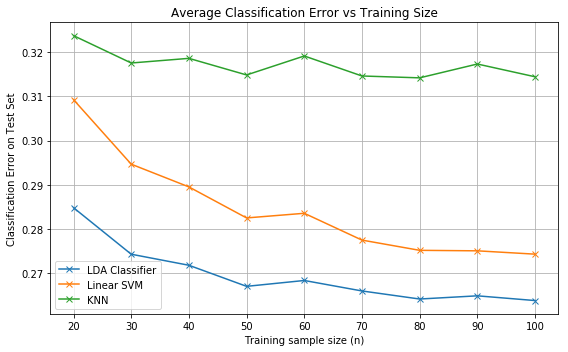

In [9]:
#plot error vs n
fig, ax = plt.subplots(figsize=[8,5])
plt.plot(nlist,1-score_avg[:,0],marker='x',label='LDA Classifier')
plt.plot(nlist,1-score_avg[:,1],marker='x',label='Linear SVM')
plt.plot(nlist,1-score_avg[:,2],marker='x',label='KNN')
plt.hold(True)
plt.title('Average Classification Error vs Training Size')
plt.ylabel('Classification Error on Test Set')
plt.xlabel('Training sample size (n)')
fig.tight_layout()
ax.legend()
plt.grid(True)
plt.show
fig.savefig('hw2_1a.png')

In [10]:
#part1a
sigma=2
rho=0.2
u1=np.array([0,0])
u2=np.array([1,1])
cov=np.array([[sigma**2,rho*sigma**2],[rho*sigma**2,sigma**2]])
print('cov',cov)

nlist=np.linspace(20,100,num=9)

test_error=np.zeros(len(nlist))
err_lda=np.zeros(len(nlist))

count=0
score_avg=np.zeros([len(nlist),3])
for train_n in range(0,len(nlist)) :
    score=[0,0,0]
    conf_matrix=np.float64(([0,0],[0,0])*3)
    for rep_i in range(0,1000):

        #import pdb; pdb.set_trace()
        #create sample two guassian distributions for each mean training data
        x1_train=np.random.multivariate_normal(u1,cov,int(nlist[train_n]/2))
        y1_train=np.zeros(int(nlist[train_n]/2))
        for i in range (0,int(nlist[train_n]/2)):
            y1_train[i]=0
        x2_train=np.random.multivariate_normal(u2,cov,int(nlist[train_n]/2))
        y2_train=np.zeros(int(nlist[train_n]/2))
        for i in range (0,int(nlist[train_n]/2)):
            y2_train[i]=1
            
        X_train=np.concatenate((x1_train,x2_train),axis=0)
        Y_train=np.concatenate((y1_train,y2_train),axis=0)
         
        # generate test set 
        x1_test=np.random.multivariate_normal(u1,cov,200)
        y1_test=np.zeros(200)
        for i in range (0,200):
            y1_test[i]=0
        x2_test=np.random.multivariate_normal(u2,cov,200)
        y2_test=np.zeros(200)
        for i in range (0,200):
            y2_test[i]=1
        
        X_test=np.concatenate((x1_test,x2_test),axis=0)
        Y_test=np.concatenate((y1_test,y2_test),axis=0)
        
        #model1
        model1 = LinearDiscriminantAnalysis()
        model1.fit(X_train, Y_train)
        LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
        solver='svd', store_covariance=False, tol=0.0001)
        Y_pred1=model1.predict(X_test)
        
        #model2
        model2 = SVC(gamma='auto')
        model2.fit(X_train, Y_train)
        SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
        decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
        max_iter=-1, probability=False, random_state=None, shrinking=True,
        tol=0.001, verbose=False)
        Y_pred2=model2.predict(X_test)
        
        #model2
        model3 = KNeighborsClassifier(n_neighbors=3)
        model3.fit(X_train, Y_train)
        KNeighborsClassifier(...)
        Y_pred3=model3.predict(X_test)     
        
        
        #acccuracy for this iteration
        score[0]+=model1.score(X_test,Y_test)
        score[1]+=model2.score(X_test,Y_test)
        score[2]+=model3.score(X_test,Y_test)
        conf_matrix[0:2][0:2]+=np.divide(confusion_matrix(Y_test, Y_pred1),200)
        conf_matrix[2:4][0:2]+=np.divide(confusion_matrix(Y_test, Y_pred2),200)
        conf_matrix[4:6][0:2]+=np.divide(confusion_matrix(Y_test, Y_pred3),200)

    #average the accuracy and conf matrix
    for modelcount in range (0,3):
        print(score)
        score_avg[count,modelcount]=score[modelcount]/1000
        
        print('scoreavg',modelcount,score_avg[count,modelcount])
    count+=1
        #np.append(conf_matrix_avg[modelcount],np.divide(conf_matrix[modelcount],1000), axis=0)


cov [[4.  0.8]
 [0.8 4. ]]
[587.3825000000003, 543.1825000000003, 555.6974999999999]
scoreavg 0 0.5873825000000003
[587.3825000000003, 543.1825000000003, 555.6974999999999]
scoreavg 1 0.5431825000000003
[587.3825000000003, 543.1825000000003, 555.6974999999999]
scoreavg 2 0.5556974999999998
[599.7375000000001, 551.5999999999995, 558.9525000000009]
scoreavg 0 0.5997375
[599.7375000000001, 551.5999999999995, 558.9525000000009]
scoreavg 1 0.5515999999999994
[599.7375000000001, 551.5999999999995, 558.9525000000009]
scoreavg 2 0.5589525000000009
[603.8375000000001, 555.4775000000002, 556.7825000000003]
scoreavg 0 0.6038375000000001
[603.8375000000001, 555.4775000000002, 556.7825000000003]
scoreavg 1 0.5554775000000002
[603.8375000000001, 555.4775000000002, 556.7825000000003]
scoreavg 2 0.5567825000000003
[608.8225000000003, 562.0524999999999, 560.0624999999991]
scoreavg 0 0.6088225000000004
[608.8225000000003, 562.0524999999999, 560.0624999999991]
scoreavg 1 0.5620524999999998
[608.822500000

C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
C:\Users\aksha\Anaconda3\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\aksha\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


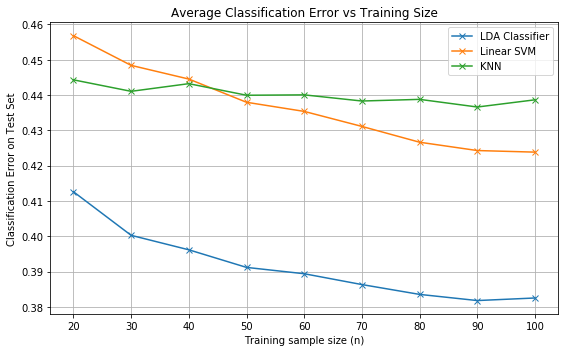

In [11]:
#plot error vs n
fig, ax = plt.subplots(figsize=[8,5])
plt.plot(nlist,1-score_avg[:,0],marker='x',label='LDA Classifier')
plt.plot(nlist,1-score_avg[:,1],marker='x',label='Linear SVM')
plt.plot(nlist,1-score_avg[:,2],marker='x',label='KNN')
plt.hold(True)
plt.title('Average Classification Error vs Training Size')
plt.ylabel('Classification Error on Test Set')
plt.xlabel('Training sample size (n)')
fig.tight_layout()
ax.legend()
plt.grid(True)
plt.show
fig.savefig('hw2_11a.png')

cov [[1.  0.2]
 [0.2 1. ]]
count of n 1
score kf [[0.5756  0.47075 0.5508 ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]]
score loo [[0.6741  0.6329  0.63955]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]]
score avg [[0.76085 0.82015 0.81415]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]]
score avg [[0.7172475 0.6914725 0.67561  ]
 [0.        0.        0.       ]
 [0.        0.        0.       ]
 [0.        0.        0.       ]
 [0.        0.        0.       ]
 [0.        0.        0.

count of n 8
score kf [[0.5756     0.47075    0.5508    ]
 [0.59886667 0.51716667 0.56933333]
 [0.610725   0.542      0.57765   ]
 [0.61262    0.54948    0.57698   ]
 [0.61331667 0.56045    0.58371667]
 [0.61552857 0.56605714 0.58374286]
 [0.6155375  0.572225   0.5843375 ]
 [0.61973333 0.57277778 0.58777778]
 [0.         0.         0.        ]]
score loo [[0.6741     0.6329     0.63955   ]
 [0.7061     0.6739     0.66293333]
 [0.717325   0.693975   0.671625  ]
 [0.7205     0.70284    0.67162   ]
 [0.72326667 0.70921667 0.67931667]
 [0.7259     0.71118571 0.67588571]
 [0.7275375  0.716725   0.67735   ]
 [0.73098889 0.71941111 0.68017778]
 [0.         0.         0.        ]]
score avg [[0.76085    0.82015    0.81415   ]
 [0.7578     0.80356667 0.82366667]
 [0.754375   0.791625   0.8237    ]
 [0.75046    0.78422    0.82566   ]
 [0.74795    0.77868333 0.82555   ]
 [0.74735714 0.77318571 0.82407143]
 [0.7451375  0.7730125  0.823975  ]
 [0.7472     0.77072222 0.82474444]
 [0.         0.     

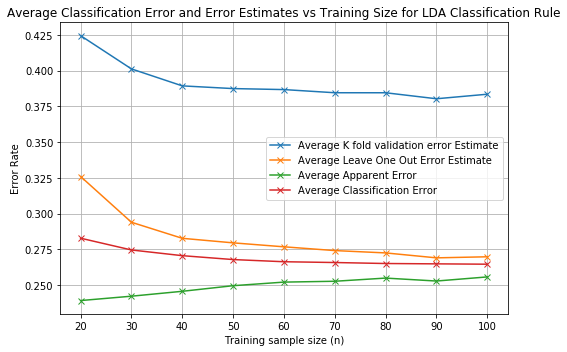

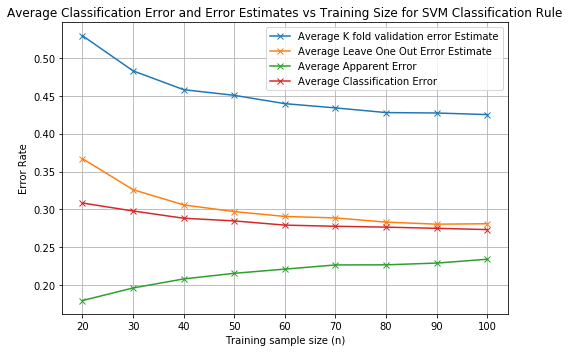

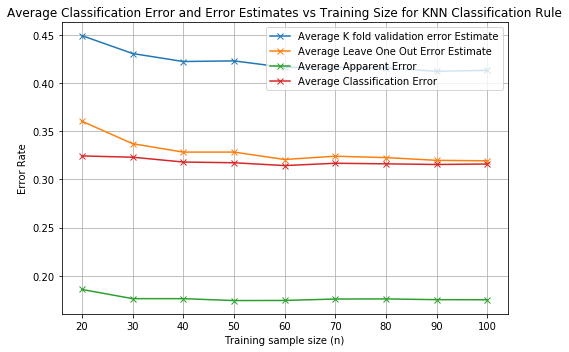

In [13]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold

#part1a
sigma=1
rho=0.2
u1=np.array([0,0])
u2=np.array([1,1])
cov=np.array([[sigma**2,rho*sigma**2],[rho*sigma**2,sigma**2]])
print('cov',cov)

nlist=np.linspace(20,100,num=9)

test_error=np.zeros(len(nlist))
err_lda=np.zeros(len(nlist))

count=0
score_avg=np.zeros([len(nlist),3])
score_avgkf=np.zeros([len(nlist),3])
score_avgloo=np.zeros([len(nlist),3])
score_avgcl=np.zeros([len(nlist),3])
for train_n in range(0,len(nlist)) :
    scorekf=[0,0,0]
    scoreloo=[0,0,0]
    score=[0,0,0]
    score_cl=[0,0,0]
    #import pdb; pdb.set_trace()
    for rep_i in range(0,1000):

        #import pdb; pdb.set_trace()
        #create sample two guassian distributions for each mean training data
        x1_train=np.random.multivariate_normal(u1,cov,int(nlist[train_n]/2))
        y1_train=np.zeros(int(nlist[train_n]/2))
        for i in range (0,int(nlist[train_n]/2)):
            y1_train[i]=0
        x2_train=np.random.multivariate_normal(u2,cov,int(nlist[train_n]/2))
        y2_train=np.zeros(int(nlist[train_n]/2))
        for i in range (0,int(nlist[train_n]/2)):
            y2_train[i]=1
            
        X_train=np.concatenate((x1_train,x2_train),axis=0)
        Y_train=np.concatenate((y1_train,y2_train),axis=0)
         
        # generate test set 
        x1_test=np.random.multivariate_normal(u1,cov,200)
        y1_test=np.zeros(200)
        for i in range (0,200):
            y1_test[i]=0
        x2_test=np.random.multivariate_normal(u2,cov,200)
        y2_test=np.zeros(200)
        for i in range (0,200):
            y2_test[i]=1
        
        X_test=np.concatenate((x1_test,x2_test),axis=0)
        Y_test=np.concatenate((y1_test,y2_test),axis=0)
            
        #kfold validation error estimate
        kf = KFold(n_splits=5)
        kf.get_n_splits(X_train)
        KFold(n_splits=5, random_state=None, shuffle=True)
        for train_index, test_index in kf.split(X_train):
            X_trainkf, X_testkf = X_train[train_index], X_train[test_index]
            Y_trainkf, Y_testkf = Y_train[train_index], Y_train[test_index]          
        
            #model1
            model1 = LinearDiscriminantAnalysis()
            model1.fit(X_trainkf, Y_trainkf)
            LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
            solver='svd', store_covariance=False, tol=0.0001)
            Y_pred1=model1.predict(X_testkf)

            #model2
            model2 = SVC(gamma='auto')
            model2.fit(X_trainkf, Y_trainkf)
            SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
            decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
            max_iter=-1, probability=False, random_state=None, shrinking=True,
            tol=0.001, verbose=False)
            Y_pred2=model2.predict(X_testkf)

            #model2
            model3 = KNeighborsClassifier(n_neighbors=3)
            model3.fit(X_trainkf, Y_trainkf)
            KNeighborsClassifier(...)
            Y_pred3=model3.predict(X_testkf)     
        
            #acccuracy for this iteration
            scorekf[0]+=model1.score(X_testkf,Y_testkf)
            scorekf[1]+=model2.score(X_testkf,Y_testkf)
            scorekf[2]+=model3.score(X_testkf,Y_testkf)
            
        #import pdb; pdb.set_trace()
        
        
        # leave one out error estimate
        loo = LeaveOneOut()
        loo.get_n_splits(X_train)

        LeaveOneOut()
        for train_index, test_index in loo.split(X_train):
            X_trainloo, X_testloo = X_train[train_index], X_train[test_index]
            Y_trainloo, Y_testloo = Y_train[train_index], Y_train[test_index]
            
            #model1
            model1 = LinearDiscriminantAnalysis()
            model1.fit(X_trainloo, Y_trainloo)
            LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
            solver='svd', store_covariance=False, tol=0.0001)
            Y_pred1=model1.predict(X_testloo)

            #model2
            model2 = SVC(gamma='auto')
            model2.fit(X_trainloo, Y_trainloo)
            SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
            decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
            max_iter=-1, probability=False, random_state=None, shrinking=True,
            tol=0.001, verbose=False)
            Y_pred2=model2.predict(X_testloo)

            #model2
            model3 = KNeighborsClassifier(n_neighbors=3)
            model3.fit(X_trainloo, Y_trainloo)
            KNeighborsClassifier(...)
            Y_pred3=model3.predict(X_testloo)     
        
            #acccuracy for this iteration
            scoreloo[0]+=model1.score(X_testloo,Y_testloo)
            scoreloo[1]+=model2.score(X_testloo,Y_testloo)
            scoreloo[2]+=model3.score(X_testloo,Y_testloo)
        
        
        # average apparent error
        #model1
        model1 = LinearDiscriminantAnalysis()
        model1.fit(X_train, Y_train)
        LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
        solver='svd', store_covariance=False, tol=0.0001)
        Y_pred1=model1.predict(X_test)
        
        #model2
        model2 = SVC(gamma='auto')
        model2.fit(X_train, Y_train)
        SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
        decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
        max_iter=-1, probability=False, random_state=None, shrinking=True,
        tol=0.001, verbose=False)
        Y_pred2=model2.predict(X_test)
        
        #model2
        model3 = KNeighborsClassifier(n_neighbors=3)
        model3.fit(X_train, Y_train)
        KNeighborsClassifier(...)
        Y_pred3=model3.predict(X_test)     
        
        
        #acccuracy for this iteration
        score[0]+=model1.score(X_train,Y_train)
        score[1]+=model2.score(X_train,Y_train)
        score[2]+=model3.score(X_train,Y_train)
        
        # average classification error
        #model1
        model1 = LinearDiscriminantAnalysis()
        model1.fit(X_train, Y_train)
        LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
        solver='svd', store_covariance=False, tol=0.0001)
        Y_pred1=model1.predict(X_test)
        
        #model2
        model2 = SVC(gamma='auto')
        model2.fit(X_train, Y_train)
        SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
        decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
        max_iter=-1, probability=False, random_state=None, shrinking=True,
        tol=0.001, verbose=False)
        Y_pred2=model2.predict(X_test)
        
        #model2
        model3 = KNeighborsClassifier(n_neighbors=3)
        model3.fit(X_train, Y_train)
        KNeighborsClassifier(...)
        Y_pred3=model3.predict(X_test)     
        
        
        #acccuracy for this iteration
        score_cl[0]+=model1.score(X_test,Y_test)
        score_cl[1]+=model2.score(X_test,Y_test)
        score_cl[2]+=model3.score(X_test,Y_test)
    
    #average across k folds
    scorekf=np.divide(scorekf,5)  
    #average leave one out error estimate
    scoreloo=np.divide(scoreloo,int(nlist[train_n]))
    
    #average the accuracy for kf,loo,and average classification error
    for modelcount in range (0,3):
        score_avgkf[count,modelcount]=scorekf[modelcount]/1000
        score_avgloo[count,modelcount]=scoreloo[modelcount]/1000
        score_avg[count,modelcount]=score[modelcount]/1000
        score_avgcl[count,modelcount]=score_cl[modelcount]/1000
                      
    count+=1
    print ('count of n',count)
    print ('score kf',score_avgkf)
    print('score loo',score_avgloo)
    print('score avg',score_avg)
    print('score avg',score_avgcl)

#plot error curves for LDA
fig, ax = plt.subplots(figsize=[8,5])
plt.plot(nlist,1-score_avgkf[:,0],marker='x',label='Average K fold validation error Estimate')
plt.plot(nlist,1-score_avgloo[:,0],marker='x',label='Average Leave One Out Error Estimate')
plt.plot(nlist,1-score_avg[:,0],marker='x',label='Average Apparent Error')
plt.plot(nlist,1-score_avgcl[:,0],marker='x',label='Average Classification Error')
plt.title('Average Classification Error and Error Estimates vs Training Size for LDA Classification Rule')
plt.ylabel('Error Rate')
plt.xlabel('Training sample size (n)')
fig.tight_layout()
ax.legend()
plt.grid(True)
plt.show
fig.savefig('hw2_14b.png')
                      
#plot error curves for SVM
fig, ax = plt.subplots(figsize=[8,5])
plt.plot(nlist,1-score_avgkf[:,1],marker='x',label='Average K fold validation error Estimate')
plt.plot(nlist,1-score_avgloo[:,1],marker='x',label='Average Leave One Out Error Estimate')
plt.plot(nlist,1-score_avg[:,1],marker='x',label='Average Apparent Error')
plt.plot(nlist,1-score_avgcl[:,1],marker='x',label='Average Classification Error')
plt.title('Average Classification Error and Error Estimates vs Training Size for SVM Classification Rule')
plt.ylabel('Error Rate')
plt.xlabel('Training sample size (n)')
fig.tight_layout()
ax.legend()
plt.grid(True)
plt.show
fig.savefig('hw2_15b.png')
                      
#plot error curves for KNN
fig, ax = plt.subplots(figsize=[8,5])
plt.plot(nlist,1-score_avgkf[:,2],marker='x',label='Average K fold validation error Estimate')
plt.plot(nlist,1-score_avgloo[:,2],marker='x',label='Average Leave One Out Error Estimate')
plt.plot(nlist,1-score_avg[:,2],marker='x',label='Average Apparent Error')
plt.plot(nlist,1-score_avgcl[:,2],marker='x',label='Average Classification Error')
plt.title('Average Classification Error and Error Estimates vs Training Size for KNN Classification Rule')
plt.ylabel('Error Rate')
plt.xlabel('Training sample size (n)')
fig.tight_layout()
ax.legend()
plt.grid(True)
plt.show
fig.savefig('hw2_16b.png')

In [14]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold

#part1a
sigma=2
rho=0.2
u1=np.array([0,0])
u2=np.array([1,1])
cov=np.array([[sigma**2,rho*sigma**2],[rho*sigma**2,sigma**2]])
print('cov',cov)

nlist=np.linspace(20,100,num=9)

test_error=np.zeros(len(nlist))
err_lda=np.zeros(len(nlist))

count=0
score_avg=np.zeros([len(nlist),3])
score_avgkf=np.zeros([len(nlist),3])
score_avgloo=np.zeros([len(nlist),3])
score_avgcl=np.zeros([len(nlist),3])
for train_n in range(0,len(nlist)) :
    scorekf=[0,0,0]
    scoreloo=[0,0,0]
    score=[0,0,0]
    score_cl=[0,0,0]
    #import pdb; pdb.set_trace()
    for rep_i in range(0,1000):

        #import pdb; pdb.set_trace()
        #create sample two guassian distributions for each mean training data
        x1_train=np.random.multivariate_normal(u1,cov,int(nlist[train_n]/2))
        y1_train=np.zeros(int(nlist[train_n]/2))
        for i in range (0,int(nlist[train_n]/2)):
            y1_train[i]=0
        x2_train=np.random.multivariate_normal(u2,cov,int(nlist[train_n]/2))
        y2_train=np.zeros(int(nlist[train_n]/2))
        for i in range (0,int(nlist[train_n]/2)):
            y2_train[i]=1
            
        X_train=np.concatenate((x1_train,x2_train),axis=0)
        Y_train=np.concatenate((y1_train,y2_train),axis=0)
         
        # generate test set 
        x1_test=np.random.multivariate_normal(u1,cov,200)
        y1_test=np.zeros(200)
        for i in range (0,200):
            y1_test[i]=0
        x2_test=np.random.multivariate_normal(u2,cov,200)
        y2_test=np.zeros(200)
        for i in range (0,200):
            y2_test[i]=1
        
        X_test=np.concatenate((x1_test,x2_test),axis=0)
        Y_test=np.concatenate((y1_test,y2_test),axis=0)
            
        #kfold validation error estimate
        kf = KFold(n_splits=5)
        kf.get_n_splits(X_train)
        KFold(n_splits=5, random_state=None, shuffle=True)
        for train_index, test_index in kf.split(X_train):
            X_trainkf, X_testkf = X_train[train_index], X_train[test_index]
            Y_trainkf, Y_testkf = Y_train[train_index], Y_train[test_index]          
        
            #model1
            model1 = LinearDiscriminantAnalysis()
            model1.fit(X_trainkf, Y_trainkf)
            LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
            solver='svd', store_covariance=False, tol=0.0001)
            Y_pred1=model1.predict(X_testkf)

            #model2
            model2 = SVC(gamma='auto')
            model2.fit(X_trainkf, Y_trainkf)
            SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
            decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
            max_iter=-1, probability=False, random_state=None, shrinking=True,
            tol=0.001, verbose=False)
            Y_pred2=model2.predict(X_testkf)

            #model2
            model3 = KNeighborsClassifier(n_neighbors=3)
            model3.fit(X_trainkf, Y_trainkf)
            KNeighborsClassifier(...)
            Y_pred3=model3.predict(X_testkf)     
        
            #acccuracy for this iteration
            scorekf[0]+=model1.score(X_testkf,Y_testkf)
            scorekf[1]+=model2.score(X_testkf,Y_testkf)
            scorekf[2]+=model3.score(X_testkf,Y_testkf)
            
        #import pdb; pdb.set_trace()
        
        
        # leave one out error estimate
        loo = LeaveOneOut()
        loo.get_n_splits(X_train)

        LeaveOneOut()
        for train_index, test_index in loo.split(X_train):
            X_trainloo, X_testloo = X_train[train_index], X_train[test_index]
            Y_trainloo, Y_testloo = Y_train[train_index], Y_train[test_index]
            
            #model1
            model1 = LinearDiscriminantAnalysis()
            model1.fit(X_trainloo, Y_trainloo)
            LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
            solver='svd', store_covariance=False, tol=0.0001)
            Y_pred1=model1.predict(X_testloo)

            #model2
            model2 = SVC(gamma='auto')
            model2.fit(X_trainloo, Y_trainloo)
            SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
            decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
            max_iter=-1, probability=False, random_state=None, shrinking=True,
            tol=0.001, verbose=False)
            Y_pred2=model2.predict(X_testloo)

            #model2
            model3 = KNeighborsClassifier(n_neighbors=3)
            model3.fit(X_trainloo, Y_trainloo)
            KNeighborsClassifier(...)
            Y_pred3=model3.predict(X_testloo)     
        
            #acccuracy for this iteration
            scoreloo[0]+=model1.score(X_testloo,Y_testloo)
            scoreloo[1]+=model2.score(X_testloo,Y_testloo)
            scoreloo[2]+=model3.score(X_testloo,Y_testloo)
        
        
        # average apparent error
        #model1
        model1 = LinearDiscriminantAnalysis()
        model1.fit(X_train, Y_train)
        LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
        solver='svd', store_covariance=False, tol=0.0001)
        Y_pred1=model1.predict(X_test)
        
        #model2
        model2 = SVC(gamma='auto')
        model2.fit(X_train, Y_train)
        SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
        decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
        max_iter=-1, probability=False, random_state=None, shrinking=True,
        tol=0.001, verbose=False)
        Y_pred2=model2.predict(X_test)
        
        #model2
        model3 = KNeighborsClassifier(n_neighbors=3)
        model3.fit(X_train, Y_train)
        KNeighborsClassifier(...)
        Y_pred3=model3.predict(X_test)     
        
        
        #acccuracy for this iteration
        score[0]+=model1.score(X_train,Y_train)
        score[1]+=model2.score(X_train,Y_train)
        score[2]+=model3.score(X_train,Y_train)
        
        # average classification error
        #model1
        model1 = LinearDiscriminantAnalysis()
        model1.fit(X_train, Y_train)
        LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
        solver='svd', store_covariance=False, tol=0.0001)
        Y_pred1=model1.predict(X_test)
        
        #model2
        model2 = SVC(gamma='auto')
        model2.fit(X_train, Y_train)
        SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
        decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
        max_iter=-1, probability=False, random_state=None, shrinking=True,
        tol=0.001, verbose=False)
        Y_pred2=model2.predict(X_test)
        
        #model2
        model3 = KNeighborsClassifier(n_neighbors=3)
        model3.fit(X_train, Y_train)
        KNeighborsClassifier(...)
        Y_pred3=model3.predict(X_test)     
        
        
        #acccuracy for this iteration
        score_cl[0]+=model1.score(X_test,Y_test)
        score_cl[1]+=model2.score(X_test,Y_test)
        score_cl[2]+=model3.score(X_test,Y_test)
    
    #average across k folds
    scorekf=np.divide(scorekf,5)  
    #average leave one out error estimate
    scoreloo=np.divide(scoreloo,int(nlist[train_n]))
    
    #average the accuracy for kf,loo,and average classification error
    for modelcount in range (0,3):
        score_avgkf[count,modelcount]=scorekf[modelcount]/1000
        score_avgloo[count,modelcount]=scoreloo[modelcount]/1000
        score_avg[count,modelcount]=score[modelcount]/1000
        score_avgcl[count,modelcount]=score_cl[modelcount]/1000
                      
    count+=1
    print ('count of n',count)
    print ('score kf',score_avgkf)
    print('score loo',score_avgloo)
    print('score avg',score_avg)
    print('score avg',score_avgcl)



cov [[4.  0.8]
 [0.8 4. ]]
count of n 1
score kf [[0.38875 0.2745  0.41575]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]]
score loo [[0.52935 0.46175 0.52655]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]]
score avg [[0.6761  0.87595 0.764  ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]]
score avg [[0.5866075 0.54454   0.556875 ]
 [0.        0.        0.       ]
 [0.        0.        0.       ]
 [0.        0.        0.       ]
 [0.        0.        0.       ]
 [0.        0.        0.

count of n 8
score kf [[0.38875    0.2745     0.41575   ]
 [0.3774     0.28636667 0.41353333]
 [0.373975   0.30095    0.423525  ]
 [0.36638    0.30478    0.41838   ]
 [0.36841667 0.31555    0.42836667]
 [0.36444286 0.31161429 0.42524286]
 [0.37285    0.321675   0.426675  ]
 [0.36805556 0.31762222 0.42365556]
 [0.         0.         0.        ]]
score loo [[0.52935    0.46175    0.52655   ]
 [0.55556667 0.49756667 0.5341    ]
 [0.57545    0.523575   0.5444    ]
 [0.57922    0.5327     0.5454    ]
 [0.59078333 0.54341667 0.55173333]
 [0.59032857 0.54717143 0.5518    ]
 [0.6011875  0.5544     0.5541125 ]
 [0.6024     0.55722222 0.55366667]
 [0.         0.         0.        ]]
score avg [[0.6761     0.87595    0.764     ]
 [0.655      0.8387     0.76806667]
 [0.648025   0.8122     0.767675  ]
 [0.64166    0.79252    0.766     ]
 [0.63896667 0.78168333 0.77146667]
 [0.63341429 0.76701429 0.77118571]
 [0.636225   0.7582125  0.770775  ]
 [0.6332     0.74954444 0.77335556]
 [0.         0.     

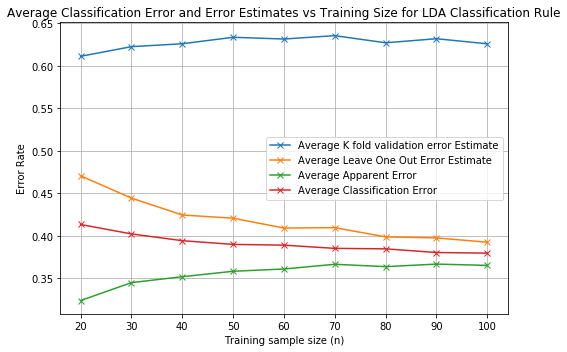

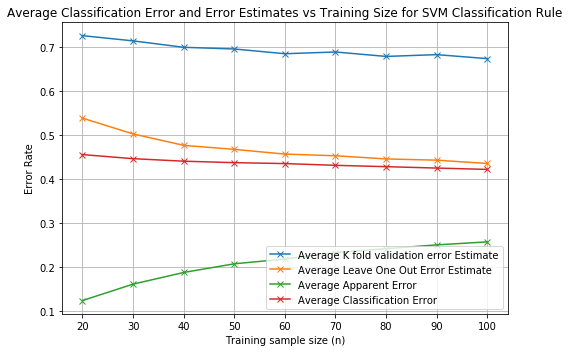

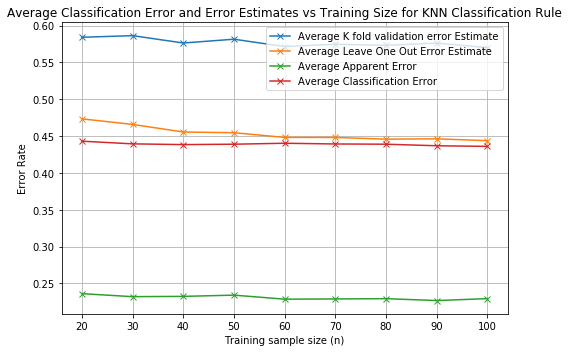

In [15]:
#plot error curves for LDA
fig, ax = plt.subplots(figsize=[8,5])
plt.plot(nlist,1-score_avgkf[:,0],marker='x',label='Average K fold validation error Estimate')
plt.plot(nlist,1-score_avgloo[:,0],marker='x',label='Average Leave One Out Error Estimate')
plt.plot(nlist,1-score_avg[:,0],marker='x',label='Average Apparent Error')
plt.plot(nlist,1-score_avgcl[:,0],marker='x',label='Average Classification Error')
plt.title('Average Classification Error and Error Estimates vs Training Size for LDA Classification Rule')
plt.ylabel('Error Rate')
plt.xlabel('Training sample size (n)')
fig.tight_layout()
ax.legend()
plt.grid(True)
plt.show
fig.savefig('hw2_17b.png')
                      
#plot error curves for SVM
fig, ax = plt.subplots(figsize=[8,5])
plt.plot(nlist,1-score_avgkf[:,1],marker='x',label='Average K fold validation error Estimate')
plt.plot(nlist,1-score_avgloo[:,1],marker='x',label='Average Leave One Out Error Estimate')
plt.plot(nlist,1-score_avg[:,1],marker='x',label='Average Apparent Error')
plt.plot(nlist,1-score_avgcl[:,1],marker='x',label='Average Classification Error')
plt.title('Average Classification Error and Error Estimates vs Training Size for SVM Classification Rule')
plt.ylabel('Error Rate')
plt.xlabel('Training sample size (n)')
fig.tight_layout()
ax.legend()
plt.grid(True)
plt.show
fig.savefig('hw2_18b.png')
                      
#plot error curves for KNN
fig, ax = plt.subplots(figsize=[8,5])
plt.plot(nlist,1-score_avgkf[:,2],marker='x',label='Average K fold validation error Estimate')
plt.plot(nlist,1-score_avgloo[:,2],marker='x',label='Average Leave One Out Error Estimate')
plt.plot(nlist,1-score_avg[:,2],marker='x',label='Average Apparent Error')
plt.plot(nlist,1-score_avgcl[:,2],marker='x',label='Average Classification Error')
plt.title('Average Classification Error and Error Estimates vs Training Size for KNN Classification Rule')
plt.ylabel('Error Rate')
plt.xlabel('Training sample size (n)')
fig.tight_layout()
ax.legend()
plt.grid(True)
plt.show
fig.savefig('hw2_19b.png')